In [63]:
# Import packages

import numpy as np
import pandas as pd
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator 
import heapq

import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'cross_validation' from 'sklearn' (c:\Python310\lib\site-packages\sklearn\__init__.py)

In [ ]:
# Import Data
movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv('tags.csv')

# Import train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
print(movies_df.head())
print(movies_df.info())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


In [ ]:
print(tags_df.head())
print(tags_df.info())

   userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB
None


In [ ]:
print(train_df.head())
print(train_df.info())

   userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
None


In [ ]:
print(test_df.head())
print(test_df.info())

   userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB
None


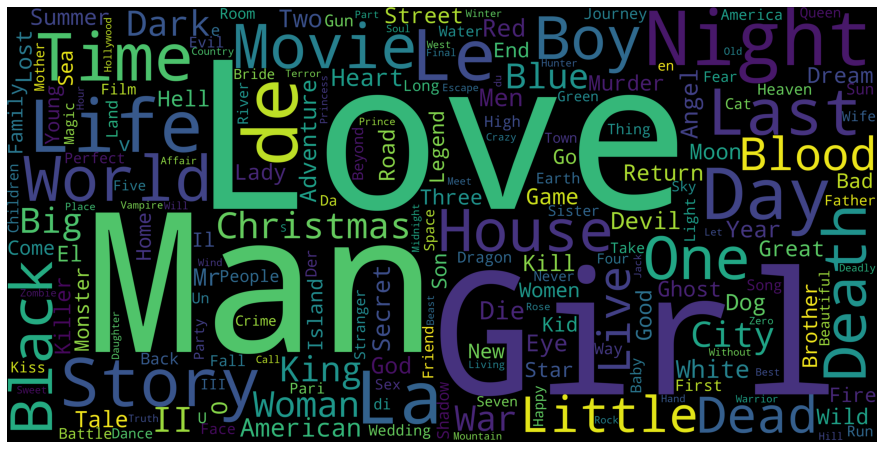

In [ ]:
# Word Cloud
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies_df['title'] = movies_df['title'].fillna("").astype('str')
title_corpus = ' '.join(movies_df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Summary of ratings from Training set
train_df['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='Density'>

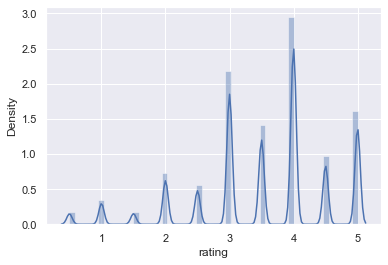

In [ ]:
# Distribution of rating
sns.set_style('whitegrid')
sns.set(font_scale=1.0)
%matplotlib inline

# Display distribution of rating
sns.distplot(train_df['rating'].fillna(train_df['rating'].median()))

In [ ]:
# Join Datasets
dataset = pd.merge(pd.merge(movies_df, train_df),tags_df)
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
9,Song of the South (1946),Adventure|Animation|Children|Musical,5.0
43,Everybody's Fine (2009),Drama,5.0
67,The Outsider (2018),Crime|Drama|Mystery,5.0
66,The Outsider (2018),Crime|Drama|Mystery,5.0
65,The Outsider (2018),Crime|Drama|Mystery,5.0
64,The Outsider (2018),Crime|Drama|Mystery,5.0
6,Song of the South (1946),Adventure|Animation|Children|Musical,5.0
7,Song of the South (1946),Adventure|Animation|Children|Musical,5.0
8,Song of the South (1946),Adventure|Animation|Children|Musical,5.0
63,The Outsider (2018),Crime|Drama|Mystery,5.0


In [ ]:
# Genre keywords
genre_labels = set()
for s in movies_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
   
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

keyword_occurences, dum = count_word(movies_df, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348]]

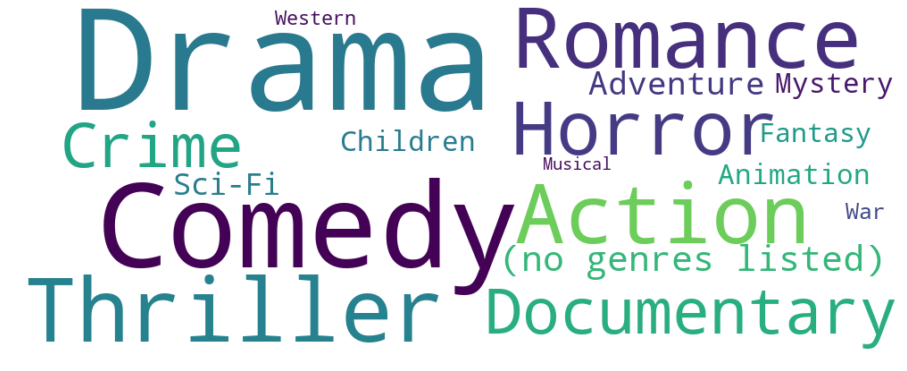

In [ ]:
# Genre Word Cloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Collaborative Filtering using train set

# Fill NaN values in user_id and movie_id column with 0
train_df['userId'] = train_df['userId'].fillna(0)
train_df['movieId'] = train_df['movieId'].fillna(0)

# Replace NaN values in rating column with average of all values
train_df['rating'] = train_df['rating'].fillna(train_df['rating'].mean())

In [ ]:
# Randomly sample 35% of the ratings dataset
small_data = train_df.sample(frac=0.35)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 6044752 to 4338723
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 381.5 MB
None


In [ ]:
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])